In [49]:
import pandas as pd
import numpy as np
df_titannic = pd.read_csv('./dataset/train.csv')
df_titannic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
# 输出分类值，及各个类别数目
df_titannic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [51]:
# 补充Age字段中的NAN值
df_titannic['Age'] = df_titannic['Age'].fillna(0)

In [52]:
# 把类别型变量转换为哑变量
a = pd.get_dummies(df_titannic['Sex'], prefix="Sex")
b = pd.get_dummies(df_titannic['Embarked'], prefix="Em")    # 登船口
# 把哑变量添加进dataframe
frames = [df_titannic, a, b]
df_titannic = pd.concat(frames, axis = 1)
df_titannic = df_titannic.drop(columns=['Sex', 'Embarked'])
df_titannic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Em_C,Em_Q,Em_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [53]:
X = df_titannic.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df_titannic.Survived.values
y = y.reshape(-1, 1)

In [54]:
X.shape

(891, 11)

In [55]:
y.shape

(891, 1)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [57]:
# 导入数据缩放器
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)# 特征归一化 训练集fit_transform
X_test = scaler.transform(X_test)# 特征归一化 测试集transform

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Sklearn逻辑回归测试准确率：{:.2f}%".format(lr.score(X_test, y_test)*100))

Sklearn逻辑回归测试准确率：81.56%


D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
# 首先定义一个sigmoid函数，输入Z，返回y'
def sigmoid(z):
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat

In [60]:
# 然后定义损失函数
def cost_function(X, y, w, b):
    # sigmoid逻辑函数+线性函数得到y'
    y_hat = sigmoid(np.dot(X, w) + b)
    # print(X.shape, w.shape)
    loss = np.abs((y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    # cost = np.sum(loss) / X.shape[0]  # 返回整个数据集平均损失
    cost = np.mean(loss)    # 返回整个数据集平均损失
    return cost

In [61]:
#定义逻辑回归梯度下降函数
def gradient_descent(X, y, w, b, lr, iter):
    l_history = np.zeros(iter)
    w_history = np.zeros((iter, w.shape[0], w.shape[1]))
    b_history = np.zeros(iter)
    for i in range(iter):
        y_hat = sigmoid(np.dot(X, w)+b)
        loss = (y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
        derivative_w = np.dot(X.T, (y_hat-y)) / X.shape[0]  # 给权重向量求导
        derivative_b = np.sum(y_hat-y) / X.shape[0]
        w = w - lr * derivative_w
        b = b - lr * derivative_b
        l_history[i] = cost_function(X, y, w, b)
        print ("轮次", i+1 , "当前轮训练集损失：",l_history[i])
        w_history[i] = w
        b_history[i] = b
    return l_history, w_history, b_history

In [62]:
# 定义预测函数
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    y_pred = np.zeros((y_hat.shape[0], 1))
    for i in range(y_hat.shape[0]):
        if y_hat[i, 0] < 0.5:
            y_pred[i, 0] = 0
        else:
            y_pred[i, 0] = 1
    return y_pred


In [63]:
# 定义逻辑回归模型
def logistic_regression(X, y, w, b, lr, iter):
    l_history, w_history, b_history = gradient_descent(X, y, w, b, lr, iter)
    print("训练最终损失:", l_history[-1])
    y_pred = predict(X, w_history[-1], b_history[-1])
    training_acc = 100 - np.mean(np.abs(y_pred - y_train)) * 100
    print("逻辑回归训练准确率: {:.2f}%".format(training_acc))
    return l_history, w_history, b_history

In [64]:
#初始化参数
dimension = X.shape[1] # 这里的维度 len(X)是矩阵的行的数，维度是列的数目
weight = np.full((dimension,1),0.1) # 权重向量，向量一般是1D，但这里实际上创建了2D张量
bias = 0 # 偏置值
#初始化超参数
alpha = 1 # 学习速率
iterations = 100 # 迭代次数

In [65]:
loss_history, weight_history, bias_history = logistic_regression(X_train, y_train, weight, bias, alpha, iterations)

轮次 1 当前轮训练集损失： 0.5600225146633998
轮次 2 当前轮训练集损失： 0.5169832564026973
轮次 3 当前轮训练集损失： 0.4976917961280204
轮次 4 当前轮训练集损失： 0.4869699281537623
轮次 5 当前轮训练集损失： 0.4802123022762601
轮次 6 当前轮训练集损失： 0.47561088043030075
轮次 7 当前轮训练集损失： 0.4723160810510354
轮次 8 当前轮训练集损失： 0.46987236934678794
轮次 9 当前轮训练集损失： 0.46801119199985647
轮次 10 当前轮训练集损失： 0.4665632956954959
轮次 11 当前轮训练集损失： 0.465416824438472
轮次 12 当前轮训练集损失： 0.4644952154928066
轮次 13 当前轮训练集损失： 0.4637446108867976
轮次 14 当前轮训练集损失： 0.4631262637788874
轮次 15 当前轮训练集损失： 0.46261175641758145
轮次 16 当前轮训练集损失： 0.4621798879501727
轮次 17 当前轮训练集损失： 0.4618145954904659
轮次 18 当前轮训练集损失： 0.4615035352569071
轮次 19 当前轮训练集损失： 0.4612370962881027
轮次 20 当前轮训练集损失： 0.46100770370692434
轮次 21 当前轮训练集损失： 0.46080931932883007
轮次 22 当前轮训练集损失： 0.46063707892043904
轮次 23 当前轮训练集损失： 0.4604870254351201
轮次 24 当前轮训练集损失： 0.46035591053759467
轮次 25 当前轮训练集损失： 0.4602410453023029
轮次 26 当前轮训练集损失： 0.46014018671890766
轮次 27 当前轮训练集损失： 0.4600514505474073
轮次 28 当前轮训练集损失： 0.45997324375755877
轮次 29 当前轮训练集损失： 0.45

In [66]:
y_pred = predict(X_test, weight_history[-1], bias_history[-1])
testing_acc = 100 - np.mean(np.abs(y_pred - y_test)) * 100
print("逻辑回归测试准确率: {:.2f}%".format(testing_acc))

逻辑回归测试准确率: 81.56%


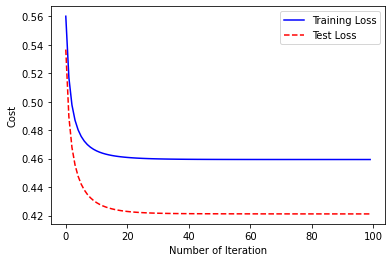

In [67]:
import matplotlib.pyplot as plt
loss_history_test = np.zeros(iterations)
for i in range(iterations):
    loss_history_test[i] = cost_function(X_test, y_test, weight_history[i], bias_history[i])
index = np.arange(0, iterations, 1)
plt.plot(index, loss_history, c='blue', linestyle='solid')
plt.plot(index, loss_history_test, c='red', linestyle='dashed')
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Number of Iteration")
plt.ylabel("Cost")
plt.show()